<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/defesa/PSD_histogram_BEST_sample_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [2]:
Repetir = 40

In [3]:
# New version change routine inside MarquesGabi_Routines
# Try to improve segmentation 
# New routine is called Segment_Filter_revisited_One... Two,Three, etc
# this exemple threshold 0.4


In [4]:
#!pip install mahotas

In [5]:
def BlackWhite(Transfere,Size):

  img_name=[]
  xw=[]
  ww=[]

  with zipfile.ZipFile(Transfere, "r") as f:
    for name in f.namelist():
      img_name.append(name)
      #xw.append(cv2.imread(name))
      xw.append(cv2.resize(cv2.imread(name),(Size,Size)))

  nrow=len(img_name)
  ncol=Size*Size
  pw=np.zeros((nrow,ncol))
  #pw=[]
  for i in range(nrow):
    ww.append(cv2.cvtColor(np.array(xw[i]), cv2.COLOR_BGR2GRAY))
    pw[i,:]=ww[i].ravel()
  return ww,img_name

In [6]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip' 
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/Doutorado


In [7]:
labels =[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)
print(labels)

['Fotos_Grandes-3cdAmostra/Q6-8-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-1.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-1.jpg', 'Fotos_Grandes-3cdAmostr

In [8]:
Size=1200 # tamanho da foto
ww,img_name=BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [9]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines


In [10]:
from Segment_Filter_Revival import Segmenta  # got image provided segmented

In [11]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [12]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [13]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [14]:
Img_Size = 28

In [15]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 64, 128, 256 '
N1 = 20
N2 = 20

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 2s 152ms/step - loss: 0.6298 - accuracy: 0.6793 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 2/200
11/11 [==============================] - 1s 125ms/step - loss: 0.3362 - accuracy: 0.8513 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 3/200
11/11 [==============================] - 1s 128ms/step - loss: 0.2410 - accuracy: 0.8980 - val_loss: 0.6931 - val_accuracy: 0.5102
Epoch 4/200
11/11 [==============================] - 1s 126ms/step - loss: 0.1587 - accuracy: 0.9388 - val_loss: 0.6935 - val_accuracy: 0.5102
Epoch 5/200
11/11 [==============================] - 1s 128ms/step - loss: 0.0907 - accuracy: 0.9650 - val_loss: 0.6937 - val_accuracy: 0.5102
Epoch 6/200
11/11 [==============================] - 1s 129ms/step - loss: 0.0644 - accuracy: 0.9854 - val_loss: 0.6946 - val_accuracy: 0.5102
Epoch 7/200
11/11 [==============================] - 1s 125ms/step - loss: 0.0588 - accuracy: 0.9883 - val_loss: 0.6959 - val_accuracy: 0.5102

In [17]:
Y_test = yback(Y_test)

In [18]:
# pred_test= model.predict_classes(X_test)
pred_test = np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   0   1
Actual         
0        69   3
1         5  70


In [19]:
print(METRICS)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        72
           1       0.96      0.93      0.95        75

    accuracy                           0.95       147
   macro avg       0.95      0.95      0.95       147
weighted avg       0.95      0.95      0.95       147



In [20]:
pred_test

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [21]:
'''
img=ww[4] 
df=Segmenta(img)
df.shape
'''

'\nimg=ww[4] \ndf=Segmenta(img)\ndf.shape\n'

In [22]:
Sample3 =[2, 5, 17] # 
# [2, 5, 17] sample 7---  [4,13,25] sample 3----[0, 3, 9] sample 8

for i in range(Repetir):
  k = 0
  for i in Sample3:
    img=ww[i]
    if( k > 0):
      df_old = df_ann.copy()
    df_ann=Segmenta(img)
    if(k > 0):
      df_ann = pd.concat( [df_ann, df_old], ignore_index = True)
    k = k + 1
#df_ann = df.copy

df_teste = np.array(df_ann)
names = df_ann.columns
df_teste = pd.DataFrame(df_teste,columns=names)
Width = df_ann['Width']
#del df_ann['Width']
names = df_ann.columns
del df_ann['Width']
result = np.array(df_ann)
result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
prediction= np.argmax(model.predict(result), axis=-1)

In [23]:
df_ann

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,125.168060,124.962357,126.618927,129.852173,134.299362,131.027557,110.367317,106.258049,136.434357,160.684113,170.838409,177.179077,179.793396,181.613419,179.106537,175.328735,171.113876,169.153336,169.654739,171.558319,170.925613,168.742905,158.491287,94.117546,86.991737,117.660240,145.454559,159.946732,127.472000,128.015610,129.577606,131.489441,132.770432,131.654739,118.375580,104.166214,104.233246,112.533531,132.701569,161.517914,...,132.056946,130.835648,132.118469,131.443542,134.536285,139.153366,142.922867,138.421494,122.854927,103.896248,104.678612,108.487617,129.675858,127.145088,125.399452,123.790649,123.887062,123.869614,124.510559,125.140503,124.981644,126.415062,128.670349,131.556473,131.398544,130.865021,132.595963,132.837463,132.143250,132.396698,133.388428,135.539948,138.211212,145.106537,147.375580,136.993576,116.404968,104.303963,104.505974,110.050507
1,119.652077,117.052315,108.934677,107.417038,110.045448,107.197632,109.752655,104.150764,74.460121,51.802132,15.244734,4.053255,2.080000,1.277633,0.754083,0.982722,1.204734,1.031953,1.000000,0.952663,1.229586,1.750769,1.999763,2.157397,1.884970,1.754793,1.734911,1.138462,119.213722,116.667938,108.226982,111.062485,113.718819,107.209000,107.256561,113.873375,112.581306,112.517410,77.494675,11.011361,...,139.648285,160.115509,168.563782,172.602127,177.364975,180.729233,185.077881,195.516220,202.990768,204.825562,203.560486,201.912659,142.327103,152.322372,154.026520,151.967346,146.869354,141.329483,136.133484,133.112915,130.172546,125.344139,121.226273,117.947693,115.913139,112.665810,108.277168,102.525208,130.429352,159.365204,168.783905,175.102966,180.804962,182.145111,175.276215,162.183182,157.046631,154.667450,157.236694,162.869354
2,132.301636,142.397202,148.006287,167.548401,184.552429,194.249680,191.728409,161.722275,57.996349,25.653444,30.523705,36.043468,51.545769,59.963619,63.635914,66.538101,66.758270,63.700634,61.921982,62.349190,61.950470,58.276432,57.962818,56.214554,55.024837,53.194611,51.654324,51.875233,135.589386,141.070709,149.312576,170.009796,191.168976,199.716125,193.685608,154.048080,66.861565,37.804222,33.440353,37.501717,...,0.967565,0.977646,0.648039,2.176711,2.664914,1.889838,0.867558,0.803419,0.825261,0.996786,1.695741,11.060341,2.277814,9.927607,35.859745,54.020599,59.273067,59.932724,60.181679,59.207611,57.302284,56.496677,48.613342,17.817371,2.947038,1.673753,1.280225,0.884871,0.716269,0.519176,0.605377,0.253123,1.222734,1.033238,0.313683,0.000000,0.168383,1.000000,1.000000,1.010227
3,122.723312,118.935020,113.114746,114.731827,117.904182,130.545380,136.845703,135.051254,139.988892,144.758270,143.802277,140.731491,140.639450,137.085281,134.442917,144.334839,147.604950,132.889084,121.995850,119.795296,122.300171,124.850708,129.705490,137.733032,159.752975,173.145950,181.461334,182.177414,127.158546,121.753937,114.999130,118.128304,122.777237,128.030655,123.713615,120.982422,139.053177,141.107346,139.871048,136.744415,...,105.217384,110.438217,110.013046,109.790939,110.468925,108.870171,107.720360,112.385185,117.225822,122.049034,124.587318,126.350677,102.456871,117.440231,144.313034,156.878784,154.785736,152.481934,150.157471,146.193726,141.049118,136.066910,125.940308,113.514351,108.834167,107.602180,107.779518,107.928658,106.744781,110.654526,111.064178,111.965271,111.989349,112.943451,112.050293,112.888359,115.267845,118.871895,123.160965,126.072144
4,120.479309,137.069550,140.995575,140.420135,142.559189,141.384644,138.991135,138.358002,135.918655,132.576935,129.380173,128.350601,126.483749,125.321014,126.767769,126.650902,121.618355,102.687881,87.247047,100.717461,124.099129,128.856506,132.042908,135.170120,137.670135,136.532562,133.785507,129.230774,120.86

In [24]:
df_teste.shape # por que esta saindo 100 ???????

(150, 785)

In [25]:
#df_ann

In [26]:
img_graos = []
Width_new = []
k = 0
for i in prediction:
  if( i == 0):
    img_graos.append(df_teste.iloc[k,:])
    Width_new.append(Width.iloc[k])

  k = k +1

img_graos = pd.DataFrame(img_graos, columns=names )


In [27]:
img_graos.shape

(69, 785)

In [28]:
prediction

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0])

In [29]:
img_graos.shape

(69, 785)

In [30]:
Width=np.array(Width_new)

In [31]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_Revival import PSDArea
from histogram_fev_2021 import PSD
#from GetBetterSegm import GetBetter

fatal: destination path 'marquesgabi_paper_fev_2021' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [32]:
#https://github.com/marquesgabi/Doutorado/blob/master/Amostra7.csv
#!git clone https://github.com/ucfilho/marquesgabi_out_2020
!git clone https://github.com/marquesgabi/Doutorado
#%cd marquesgabi_out_2020
%cd Doutorado
PSD_imageJ = 'Amostra7.csv' 
#PSD_new = pd.read_csv(PSD_imageJ,sep=';')
#encoding='utf8'

#PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))
''''''

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/Doutorado
     ;Area
0  1;1.387
1  2;1.626
2  3;1.336


''

In [33]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [34]:
Width.shape

(69,)

In [35]:
img_graos.shape

(69, 785)

In [36]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
4,104.0,120.479309,137.069550,140.995575,140.420135,142.559189,141.384644,138.991135,138.358002,135.918655,132.576935,129.380173,128.350601,126.483749,125.321014,126.767769,126.650902,121.618355,102.687881,87.247047,100.717461,124.099129,128.856506,132.042908,135.170120,137.670135,136.532562,133.785507,129.230774,120.862427,137.016281,140.415680,142.264801,141.613922,141.263321,140.306229,139.726349,137.504456,132.883148,128.761856,...,133.094696,130.267761,142.081375,156.914200,158.085831,153.168671,146.213028,141.399414,137.732254,132.344696,133.605042,139.647934,92.815102,83.668655,73.573975,70.670120,84.176041,87.313622,77.692322,85.681961,119.652382,132.112427,134.159775,132.384628,127.921616,130.309174,132.610962,133.514801,132.424576,132.683426,141.995575,152.071014,153.809189,149.968948,144.139069,139.365387,136.113922,132.539948,133.153854,139.862442
6,193.0,108.835968,110.925751,136.661926,143.637360,141.713516,141.803192,146.610275,142.179932,143.466660,146.460632,149.471237,149.967194,148.199341,143.832458,112.480476,95.110176,135.114349,152.371399,163.739578,167.972717,170.963226,170.195297,168.339157,165.798080,158.220657,152.974976,156.080505,158.098923,90.323631,121.373741,135.848160,139.899170,137.903961,142.600693,145.329926,138.059113,135.508224,139.745834,146.750946,...,113.492302,126.029655,136.396469,133.094421,123.062904,109.540390,106.597733,109.467758,109.068756,113.249535,119.761665,124.244942,95.459259,93.344307,83.931313,70.256111,62.213890,74.790810,90.573349,97.477661,100.326447,101.835381,103.926086,105.386429,95.559349,53.405403,55.290718,61.497272,87.030716,113.735542,120.857475,120.038704,111.887192,101.143593,104.158638,111.505249,116.183624,120.116249,125.305801,129.246902
12,155.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.761290,1.032633,2.333611,52.127914,85.789268,92.677391,97.893120,101.489914,107.893326,109.557220,104.639671,99.322380,99.399292,104.317474,107.587135,106.981781,106.856735,106.570038,82.307976,18.404371,34.799629,85.586311,116.296158,0.000000,0.000000,0.000000,0.000000,0.000000,0.338897,0.379896,1.229344,11.167908,66.544647,88.100822,...,100.398964,92.406708,88.948555,89.137779,101.460312,105.661034,99.539314,89.034508,86.312927,88.656158,90.995140,85.251945,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.973486,35.419983,97.333237,110.276886,111.311302,109.811447,111.384644,114.266525,107.897568,92.252281,87.282043,90.891541,92.641968,98.226273,103.329536,102.511566,98.189636,92.727913,91.916916,97.222237,96.567413
13,143.0,109.776802,108.948891,109.414787,109.893242,108.390282,111.111397,112.363579,113.718567,117.817001,120.826241,124.004684,125.861206,124.536552,110.329788,78.427841,34.766247,47.394348,92.908836,107.465012,116.410576,112.299332,110.576988,107.986107,105.199371,100.696709,96.723412,98.806198,100.601112,112.026115,109.129646,110.328583,109.935394,108.081032,107.865662,108.696609,115.008904,119.016472,121.460411,122.103859,...,136.608521,140.042648,142.585403,143.962402,149.754547,156.592041,164.394150,169.843323,171.288071,147.212875,80.093262,80.213364,94.682816,92.015121,93.739883,90.933495,83.318108,89.955009,110.987099,137.058777,159.934067,173.888214,177.602234,174.768265,166.264114,158.887238,150.814911,143.041031,141.995987,147.114868,152.519974,157.842575,163.190704,170.680786,178.627228,183.645645,169.710587,118.430923,81.073837,90.968697
17,149.0,22.331291,22.191839,22.166388,24.658077,23.919510,20.240395,6.337328,3.363407,1.562002,1.146165,1.099275,1.446737,2.854736,2.867889,3.159543,2.631728,2.569929,2.701095,1.653034,0.897752,1.175488,0.752354,0.641007,0.178415,0.000000,0.141255,0.058015,0.245935,57.227200,54.848389,52.639797,53.527409,56.570297,5

In [37]:
PSD_new.shape

(102, 1)

In [38]:
Diam1 =[]
'''
# 
Area = df_ImgJ['Area'].values
# Area = np.concatenate( (Area, [lost_value] ) )

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]
'''


"\n# \nArea = df_ImgJ['Area'].values\n# Area = np.concatenate( (Area, [lost_value] ) )\n\nDiam1 = [ (4*A/np.pi)**0.5 for A in Area]\n"

In [39]:
len(Diameter_All)

69

In [40]:
A=PSD_new[';Area'].values
k = 0
Area2 = []
for i in A:
  if(A[k][2] == ';'):
    Area2.append(float(A[k][3:]))
  else:
      Area2.append(float(A[k][2:]))  
  k = k +1
print(Area2)

[1.387, 1.626, 1.336, 0.64, 2.211, 1.12, 0.974, 1.237, 1.29, 3.755, 2.778, 1.256, 1.386, 1.302, 1.071, 1.497, 1.518, 1.244, 1.532, 1.325, 1.519, 1.895, 1.22, 1.241, 1.301, 1.429, 0.667, 2.157, 1.052, 2.082, 1.517, 1.281, 0.784, 1.067, 2.764, 1.215, 0.943, 2.182, 1.486, 1.569, 2.667, 0.709, 1.006, 1.6, 1.408, 3.16, 2.465, 2.284, 1.273, 1.256, 3.021, 1.701, 1.955, 5.248, 1.627, 1.367, 1.592, 2.718, 1.658, 1.128, 2.192, 1.508, 2.547, 1.945, 1.606, 3.482, 1.756, 1.457, 1.864, 1.821, 1.314, 1.715, 1.015, 1.345, 1.265, 1.844, 1.396, 1.785, 1.694, 1.413, 1.368, 2.21, 1.034, 1.367, 1.943, 1.008, 1.279, 1.579, 1.444, 1.879, 1.466, 2.154, 1.794, 3.149, 1.883, 1.692, 1.163, 1.297, 2.949, 1.09, 1.444, 1.524]


In [41]:
len(Area2)

102

In [42]:
#lost_value = float(PSD_new.columns[1])
#Area2 = np.array(PSD_new.iloc[:,1])
#Area2 = np.concatenate( (Area2, [lost_value] ) )

for A in Area2:
  Diam1.append((4*A/np.pi)**0.5) 


In [43]:
wt1 = np.ones(len(Diam1)) / len(Diam1)*100
wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
X = pd.DataFrame([Diam1,Diameter_All])
wts = pd.DataFrame([wt1,wt2])


In [44]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101
0,1.328903,1.438849,1.304242,0.902703,1.677836,1.194164,1.113614,1.254989,1.281592,2.186553,1.880707,1.264590,1.328424,1.287539,1.167750,1.380594,1.390244,1.258535,1.396640,1.298862,1.390702,1.553315,1.246336,1.257016,1.287045,1.348873,0.921548,1.657220,1.157345,1.628154,1.389786,1.277114,0.999110,1.165567,1.875962,1.243779,1.095749,1.666796,1.375512,1.413405,...,1.800817,1.573674,1.429973,2.105569,1.495262,1.362024,1.540558,1.522685,1.293459,1.477703,1.136811,1.308628,1.269113,1.532271,1.333208,1.507558,1.468628,1.341301,1.31977,1.677456,1.147401,1.319287,1.572865,1.132884,1.276117,1.417902,1.355934,1.546744,1.366224,1.656067,1.511354,2.002356,1.54839,1.467761,1.216872,1.285065,1.937726,1.178062,1.355934,1.392989
1,0.622520,1.305577,0.843266,1.023352,0.755413,0.922269,0.819938,0.836206,1.229067,1.109242,1.225344,0.964366,0.934487,0.821860,1.334111,1.018805,1.010053,0.850496,1.447829,0.653811,1.088918,0.899597,1.254568,1.011115,0.879047,1.385362,1.328229,1.564748,1.060902,1.056334,1.147655,0.673275,0.650705,0.751467,1.570282,1.515060,0.945682,1.237213,1.383110,1.184081,...,0.942560,0.916327,0.606508,0.766685,1.346506,1.420382,1.052460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
Diameter_All

[0.6225201278230454,
 1.3055766893594187,
 0.8432660953702251,
 1.0233520381528431,
 0.7554128726414957,
 0.9222686224487269,
 0.8199375165361322,
 0.8362064792369338,
 1.229067418864593,
 1.1092423042413333,
 1.225344458723119,
 0.9643658122952145,
 0.9344866474669081,
 0.8218596282826548,
 1.3341105657326853,
 1.0188045698641144,
 1.0100532201650159,
 0.8504963134877777,
 1.4478293541886473,
 0.6538114870104224,
 1.0889182098051493,
 0.8995974948259452,
 1.2545681750840691,
 1.0111151118398407,
 0.8790469721557638,
 1.3853619559654835,
 1.3282289598362536,
 1.5647475602068228,
 1.0609015070960957,
 1.0563342043617459,
 1.1476553084794052,
 0.6732745339369501,
 0.6507054766319769,
 0.7514674021459364,
 1.5702818052552368,
 1.515060310424928,
 0.9456821376880082,
 1.2372131306092427,
 1.3831097033346917,
 1.184081148438411,
 1.172028995149906,
 0.8605617089743643,
 1.1077184664742206,
 0.6407339903327997,
 0.8641548393544307,
 1.332645136688469,
 0.658647648708856,
 0.9372012913592828,

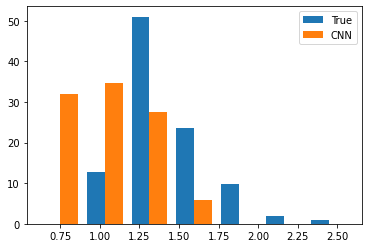

In [46]:
A = plt.hist(X,weights=wts,bins=7)
plt.legend(['True','CNN'])

In [47]:
print('ImgJ:','media=',np.mean(np.array(Diam1)),'desvio=',np.std(np.array(Diam1)),'pontos=',len(Diam1))

ImgJ: media= 1.4365604096576146 desvio= 0.2749068872026991 pontos= 102


In [48]:
print('Software:','media=',np.mean(np.array(Diameter_All)),'desvio=',np.std(np.array(Diameter_All)),'pontos=',len(Diameter_All))

Software: media= 1.0386111223348988 desvio= 0.25891640160456336 pontos= 69


In [49]:
# Software: media= 1.3185563233999378 desvio= 0.2728642468732428 pontos= 66 theshold =0.8 e repete=80
# Software: media= 1.2650227960747715 desvio= 0.22942393421076387 pontos= 20 theshold =0.5 e repete=40

In [50]:
np.mean(np.array(Diameter_All))

1.0386111223348988

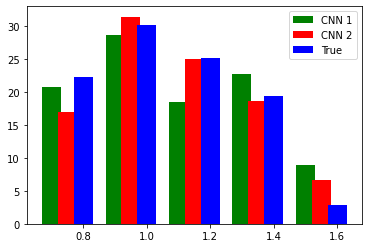

In [51]:
# Freq1 = [19.12043703, 29.22484843, 19.35872174, 20.82190224, 11.47409056] # avarage 4 samples
Freq1 = [20.69301557, 28.55598044, 18.50768331, 22.7106327, 8.905907357] # avarage 10 samples
#Freq2 = [16.93792791, 31.38008965, 24.93810752, 18.56158392, 6.233810752, 0.4]
Freq2 = [16.93792791, 31.38008965, 24.93810752, 18.56158392, 6.633810752]
Freq3 = [22.22489, 30.15078, 25.10463, 19.30926, 2.810434]
barWidth = 0.25

br1 = range(len(Freq1))
# Set position of bar on X axis
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
# labels = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8]
labels = [0.8, 1.0, 1.2, 1.4, 1.6]

xx=[]
for a in labels:
  xx.append(str(a))
plt.bar(br1, Freq1 , color="green", align="center", width=0.3, tick_label= xx) 
plt.bar(br2, Freq2 , color="red", align="center", width=0.3, tick_label= xx)
plt.bar(br3, Freq3 , color="blue", align="center", width=0.3, tick_label= xx)
plt.legend(['CNN 1','CNN 2','True'])